In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
# Для работы используйте данные для классификации с большим количеством параметров (не менее 30).
train_data = pd.read_csv('Telco customer churn (11.1.3+)/telco.csv')

# Обучите модель случайного леса (Random Forest). Рассчитайте точность
train_column = 'Churn Reason'
X = train_data

for column in X.columns:
    if X.dtypes[column] == 'int64':
        continue
    X.replace(to_replace={value: index for index, value in enumerate(set(X[column]))}, inplace=True)
X.fillna(X.median())

Y = train_data[train_column]
X = X.drop(train_column, axis=1)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_classifier_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_full.fit(X_train, Y_train)

y_pred_proba_full = rf_classifier_full.predict(X_test)

print("Предсказанные вероятности принадлежности к каждому классу для тестового набора данных (без сокращения):")
print(y_pred_proba_full)



Предсказанные вероятности принадлежности к каждому классу для тестового набора данных (без сокращения):
[ 5  0  0 ... 11  0 17]


In [20]:
# Сократите количество параметров датасета одним из способов Feature Selection (из модуля sklearn.feature_selection), например, параметры с низкой дисперсией.

combined_data = pd.concat([X_train, X_test], ignore_index=True)
selector = VarianceThreshold(0.7)
X_combined_reduced = selector.fit_transform(combined_data)

# Разделение обратно на обучающий и тестовый наборы данных
X_train_reduced = X_combined_reduced[:len(X_train)]
X_test_reduced = X_combined_reduced[len(X_train):]

# На сокращенном датасете обучите модель случайного леса (Random
# Forest). Рассчитайте точность.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_reduced, Y_train)

y_pred_reduced = rf_classifier.predict(X_test_reduced)
print("Предсказанные вероятности принадлежности к каждому классу для тестового набора данных (c сокращением):")
print(y_pred_reduced)

accuracy_full = accuracy_score(Y_test, y_pred_proba_full)
accuracy_reduced = accuracy_score(Y_test, y_pred_reduced)

print("Точность модели Random Forest на тестовом наборе данных (без сокращения):", accuracy_full)
print("Точность модели Random Forest на тестовом наборе данных (с сокращением):", accuracy_reduced)


Предсказанные вероятности принадлежности к каждому классу для тестового набора данных (c сокращением):
[ 5  0  0 ...  4  0 17]
Точность модели Random Forest на тестовом наборе данных (без сокращения): 0.8807665010645848
Точность модели Random Forest на тестовом наборе данных (с сокращением): 0.879347054648687


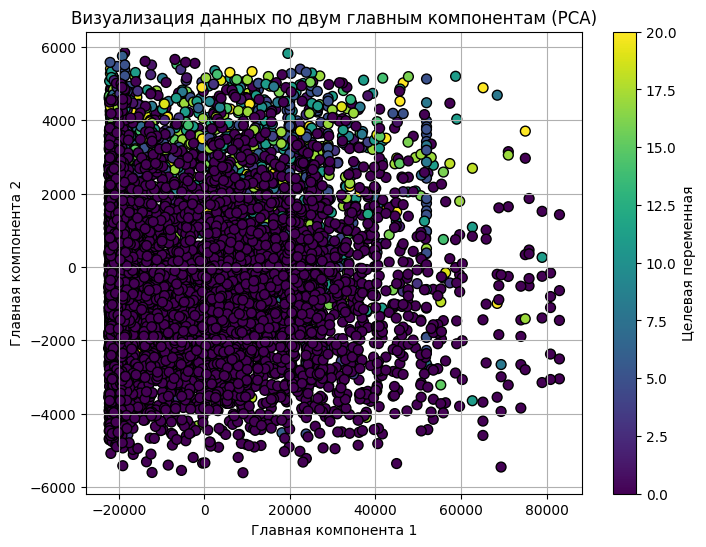

In [25]:
# К исходному (большому) датасету примените метод PCA, найдите 2 главные компоненты.

# можно с 3 с ними процент > 90
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# first_parameter, second_parameter = 43, 45

# Визуализируйте данные по этим двум компонентам.
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('Визуализация данных по двум главным компонентам (PCA)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Целевая переменная')
plt.grid(True)
plt.show()


In [26]:

# Обучите модель случайного леса на полученной модели PCA с двумя компонентами. Оцените точность и время.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_classifier_pca.fit(X_train_pca, Y_train)
training_time = time.time() - start_time
accuracy_pca = rf_classifier_pca.score(X_test_pca, Y_test)

print("Точность модели случайного леса на данных PCA с двумя компонентами: {:.2f}%".format(accuracy_pca * 100))
print("Время обучения модели: {:.4f} секунд".format(training_time))



Точность модели случайного леса на данных PCA с двумя компонентами: 69.34%
Время обучения модели: 1.2550 секунд


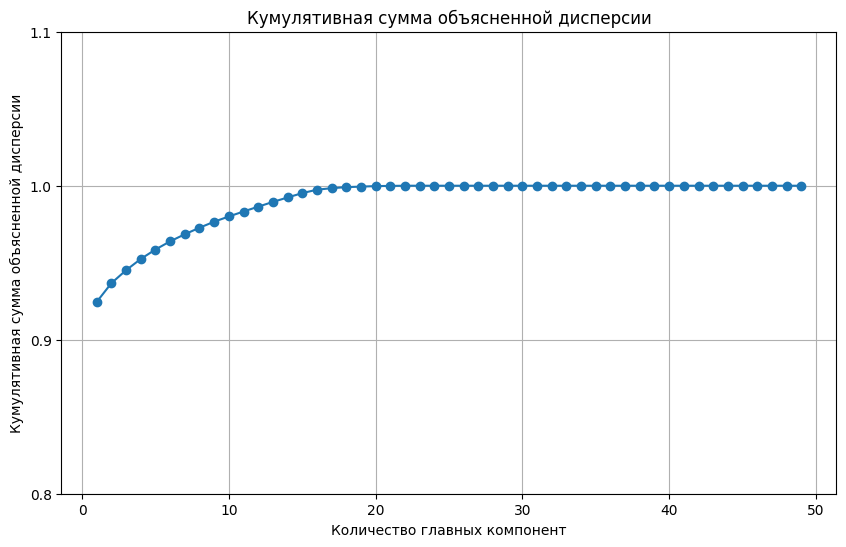

Количество главных компонент для сохранения 90% дисперсии исходных данных: 1


In [35]:
# Из графика зависимости отклонения модели от количества главных компонент найдите такое количество главных компонент, чтобы оставить 90% дисперсии исходных данных..

pca = PCA()
pca.fit(X_test)

# Вычисление кумулятивной суммы объясненной дисперсии
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_variance_ratio) + 1
), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Кумулятивная сумма объясненной дисперсии')
plt.xlabel('Количество главных компонент')
plt.ylabel('Кумулятивная сумма объясненной дисперсии')
plt.yticks(np.arange(0.8, 1.1, 0.1))
plt.grid(True)
plt.show()

n_components = 1

print("Количество главных компонент для сохранения 90% дисперсии исходных данных:", n_components)

In [7]:
# Рассчитайте модель с определенным в п.6 количеством компонент. Оцените точность и время

# Инициализация PCA с определенным количеством компонент
pca = PCA(n_components=n_components)
# Преобразование данных с использованием PCA
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_classifier_pca.fit(X_train_pca, Y_train)
training_time = time.time() - start_time
accuracy_pca = rf_classifier_pca.score(X_test_pca, Y_test)

print("Точность модели случайного леса на данных PCA с", n_components, "компонентами: {:.2f}%".format(accuracy_pca * 100))
print("Время обучения модели: {:.4f} секунд".format(training_time))

Точность модели случайного леса на данных PCA с 3 компонентами: 92.25%
Время обучения модели: 0.3748 секунд
